In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import torch

torch.cuda.empty_cache() 

In [7]:
pesq_nb = np.array([2.462, 3.255, 3.428, 3.501, 3.529, 3.528])
pesq_wb = np.array([1.916, 2.871, 3.065, 3.157, 3.192, 3.193])
stoi = np.array([0.919, 0.959, 0.966, 0.969, 0.97, 0.971])
iteration = np.array([10, 50, 100, 150, 200, 250])

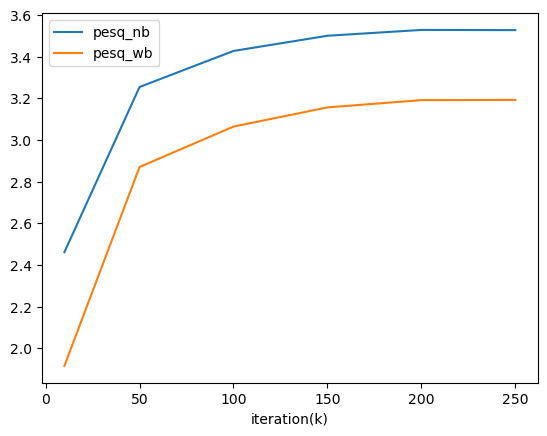

In [10]:
plt.plot(iteration, pesq_nb, label='pesq_nb')
plt.plot(iteration, pesq_wb, label='pesq_wb')
plt.xlabel('iteration(k)')
plt.legend()
plt.show()

In [5]:
import os
import torchaudio

# Set your directory here
folder_path = "/data/users/tqiu5/CleanUNet/dns/training_set/urbansound8k/noisy/"
min_duration_seconds = 1.0  # threshold in seconds

for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        filepath = os.path.join(folder_path, filename)
        try:
            waveform, sample_rate = torchaudio.load(filepath)
            duration = waveform.size(1) / sample_rate
            if duration < min_duration_seconds:
                print(f"Deleting {filename}: duration {duration:.2f}s")
                os.remove(filepath)
        except Exception as e:
            print(f"Error reading {filename}: {e}")
